**Date: 24th Aug 2021** \
**Author: Osama Sidahmed**

### Objective

The objective of this notebook is to create a classifier that differentiate between a tweet related to a real natural disaster and others that do not, using Natural language Processing (NLP) methods.

The data will be explored after which it it will be processed and then few classifiers using standard Machine learning algorithms and Deep Learning algorithms will be trained on the data to get to the best comparison using the relevant evaluation metrics.

### EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# show all columns and with maximum width
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

**Dataset Summary:**

This has been downloaded form [Kaggle](https://www.kaggle.com/vstepanenko/disaster-tweets). 
The description below is from the same page.

--------------
Description:

Context \
The file contains over 11,000 tweets associated with disaster keywords like “crash”, “quarantine”, and “bush fires” as well as the location and keyword itself. The data structure was inherited from Disasters on social media

The tweets were collected on Jan 14th, 2020.

Some of the topics people were tweeting:
The eruption of Taal Volcano in Batangas, Philippines, Coronavirus, Bushfires in Australia, Iran downing of the airplane flight PS752.

Disclaimer: The dataset contains text that may be considered profane, vulgar, or offensive.

Inspiration \
The intention was to enrich the already available data for this topic with newly collected and manually classified tweets.
The initial source Disasters on social media which is used in Real or Not? NLP with Disaster Tweets competition on Kaggle.


---------------------------------------------------------------------

The first step is to read the csv file into a data frame and explore the dataframe different fields.

In [4]:
# read dataframe
df = pd.read_csv('data/tweets.csv', index_col='id')

In [5]:
# show dataframe
df.head()

,keyword,location,text,target
id,,,,
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Stones were pelted on Muslims' houses and some houses and vehicles were set ablaze…",1
1,ablaze,NaN,"Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…",1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9,1
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8",0


In [6]:
df.tail()

,keyword,location,text,target
id,,,,
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. This wrecked my whole night. I refuse to watch…,0
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this,0
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin &amp; jinjin as my bias and im currently wrecked by rocky i hate this https://t.co/psLBecS7hI,0
11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? THOSE AU WRECKED OUR NERVES ND BRAINCELLS JDKSHSSJHS LEGENDS",0
11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


Some quick observations about the data:
- The dataframe consists of 11,370 tweets
- In addition to the id column that seems to be unique, the data consists of four (4) other columns, `keyword`, `location`, `text`, and `target`
- The `keyword` column seems to be in an alphabetical order
- The `location` column may not always refer to a real or a legible location or it may by Null
- The `text` column contains characters other than text and therefore may need to be curated
- The `target` column contains values 1's and 0's which may indicate 1 for real disaster and 0 for no disaster.
    
However more data exploration is required to confirm the above and to understand more about the dataset characteristics.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11370 non-null  object
 1   location  7952 non-null   object
 2   text      11370 non-null  object
 3   target    11370 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 444.1+ KB


From the above, it is clear that:
- No column has Null values except for the column `location` as it has an excess of 3,000 Null instances which account of almost 25% of the data in the column, we will see later after more investigation and data exploration as to how to deal with it
- Each one of the columns has the appropriate data type

Before going further we need to check for any duplicated rows and delete them as necessary.

In [8]:
df.duplicated().any()

True

There seems to be some duplicated tweets, we need to look closer at these duplicated tweets.

In [9]:
df[df.duplicated(keep=False)] # keep = false to look at all occurrences to better comapre

,keyword,location,text,target
id,,,,
786,bioterror,NaN,Does the push for mass vaccination point toward a staged bioterror event? https://t.co/o10epcfRV6,0
787,bioterror,NaN,Does the push for mass vaccination point toward a staged bioterror event? https://t.co/o10epcfRV6,0
806,bioterror,United States,Does the push for vaccination point to a staged bioterror event? https://t.co/WWvKQkY1O2,0
808,bioterror,United States,Does the push for vaccination point to a staged bioterror event? https://t.co/WWvKQkY1O2,0
2054,casualty,NaN,Study? Don't you mean disinformation campaign? https://t.co/6UNSN6CzYq,0
2056,casualty,NaN,Study? Don't you mean disinformation campaign? https://t.co/6UNSN6CzYq,0
2493,collided,"jasper,texas",the planet that collided with the earth gave us the moon... at least we got something out of the deal,0
2495,collided,"jasper,texas",the planet that collided with the earth gave us the moon... at least we got something out of the deal,0
2586,collision,Isle of Man,ROAD TRAFFIC COLLISION Victoria Road Junction with Marathon Road. Road Partially Blocked. Police en route.,1


There are many exact tweets replicas that may exist for various reasons, nevertheless, as far as our classifier is concerned, these duplicates must be deleted, and this will be done next.

In [10]:
# First get the count of the duplicates
df[df.duplicated()].count()

keyword     20
location     7
text        20
target      20
dtype: int64

There are 20 duplicates.

In [11]:
df = df.drop_duplicates()

Check again if the duplicates still exist.

In [12]:
df[df.duplicated(keep=False)]

,keyword,location,text,target
id,,,,


Al duplicates deleted successfully. The following also confirms that our dataframe has reduced by 20 rows in size.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11350 non-null  object
 1   location  7945 non-null   object
 2   text      11350 non-null  object
 3   target    11350 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 443.4+ KB


This is not to be confused with duplication on a a column or two where for instance two different persons tweet the same tweet but where a column such as the `location` indicates that the tweets are two different tweets posted by the same person about two different topics or possibly the same tweet text tweeted by two different people about the same topic. With the absence of the Twitter tweet id, this is not easy to confirm.

Let us now have a look at the `location` column and try to explore its content to decide on the impact of disregarding it from our analysis due to the huge amount of Null entries. 

In [14]:
# check for unique values
df['location'].nunique()

4504

In [15]:
print('Looking at the `location` frequency of occurrences in order DESC:'), 
df['location'].value_counts().head(10)

Looking at the `location` frequency of occurrences in order DESC:


United States      95
Australia          83
London, England    81
UK                 77
India              74
London             69
United Kingdom     59
USA                52
California, USA    47
Los Angeles, CA    45
Name: location, dtype: int64

In [16]:
print('Looking at the least common `location` values:'),
df['location'].value_counts().tail(10)

Looking at the least common `location` values:


D right place @ d right time      1
manchester city forever           1
Spartanburg, SC                   1
Alkebulan                         1
Venus,Milkyway#themorningstar     1
BREAKTHROUGH HydroMolecularMed    1
w domu u keanu                    1
the interstices                   1
Joburg                            1
18歳 約174.5cm 約49kg                1
Name: location, dtype: int64

Now we can see that there are 4,504 unique values of the `location` column out of the ~7,500 Non-Null values with `United States` on the top of the list with 95 occurrence.

This column shows "the location the tweet was sent from (may be blank)" according to the dataset owner on Kaggle. Although the data contained in this column does not appear to be homogenous, yet it appears to be holding useful information that has a potential to separate between classes should there was no Null values that account for ~25% of the entries. \
Now, the question is whether to remove this column all together or retain it and replace the Nan values by a default value.

It is not an easy question to answer at this stage but for simplifying he analysis I will remove this column. The reason behind this is the fact that the data in this column needs huge pre-processing before being of an effective use as the information within the column is not homogenous as it was mentioned earlier.

In [17]:
# drop the column `location` from the dataframe
df = df.drop(columns='location', axis = 1)

In [18]:
# and check
df.head()

,keyword,text,target
id,,,
0,ablaze,"Communal violence in Bhainsa, Telangana. ""Stones were pelted on Muslims' houses and some houses and vehicles were set ablaze…",1
1,ablaze,"Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…",1
2,ablaze,Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI,1
3,ablaze,Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9,1
4,ablaze,"""Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8",0


The dataframe is now clean and ready for pre-processing before modeling, but before that, let us do some exploration to understand more about the data content.

In [19]:
# data balance
neg_class, pos_class = round((df['target'].value_counts()/df.shape[0]) * 100, 0)
print(f'The class balance is {neg_class}% and {pos_class}% \
for the Negative and the Positive classes respectively.')

The class balance is 81.0% and 19.0% for the Negative and the Positive classes respectively.


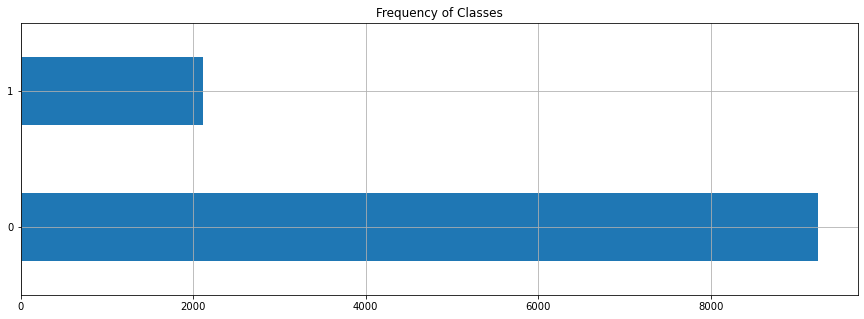

In [20]:
# visualize the class imbalance
plt.figure(figsize = (15,5))

df['target'].value_counts().plot.barh()
plt.title('Frequency of Classes')
plt.grid()

plt.show()

It is clear that the data is imbalanced with ~ 80:20 between the negative class and the positive class respectively. This is off course a problem that we need to address before we model the data as class imbalance can impact the classifier performance.

Also, it will be interesting to explore the `keyword` column more and see its related statistics and  whether is a dominant pattern.

In [21]:
print(f'There are {df["keyword"].value_counts().count()} unique values in the `keyword` column:'),
df['keyword'].value_counts(), 

There are 219 unique values in the `keyword` column:


(thunderstorm     93
 flattened        88
 stretcher        86
 mass%20murder    86
 drown            83
                  ..
 electrocuted     16
 rainstorm        11
 deluged          10
 siren            10
 tsunami           6
 Name: keyword, Length: 219, dtype: int64,)

There are 219 unique keywords on the column. Apparently, the column needs cleaning on the pre-processing stage, for instance, the value mass%20murder does not seem to be indicative unless it is curated. let us look at some random entires of the same column.

In [22]:
df.sample(5)

,keyword,text,target
id,,,
910,blazing,"-Twinkle, twinkle, little star How I wonder what you are Up above the world so high Like a diamond in the sky🌟☁️.… https://t.co/wT8FJQHnme",0
11053,wild%20fires,"Australia brought back during a dark time in his rehab from injury. Now, he's doing what he can to help return the…",1
630,attacked,#Jansena Chief and cine star #PawanKalyan arrived at #Vizag airport and headed to Kakinada where his party men were at…,0
3594,derail,Consider the possibility that what’s actually driving our opponents crazy is the fact that we’re surging in the polls and…,0
7294,mass%20murder,"Oh wait, lets' not forget Anders Brevik, that guy who committed mass murder,… https://t.co/Ys6Mx8USjk",1


In [23]:
df['text'][9126]

'$DMAN $0.019 Fastest Growing Disruptive Technology Detecting #Oil up to 40,000ft New Oil Leases/… https://t.co/qrMndCqgxq'

In [24]:
df['text'][9324]

'*tornado sirens going off* my dad: *opens back door* let me see how bad it really is'

The column is mostly one word, but sometimes the entry consists of two words (bi-grams) stuck together with the character set `%20` in between. some examples:
- emergency%20services	
- forest%20fire
- body%20bag \
etc..

In [25]:
print(f'The number of these bigrams in the keyword column is {df[df["keyword"].str.contains("%20")].count()[0]} \
entries out of {df.shape[0]} entries in the dataframe and this account for\
 {round(df[df["keyword"].str.contains("%20")].count()[0]/df.shape[0], 2)*100}% of the column instances.') 

The number of these bigrams in the keyword column is 1819 entries out of 11350 entries in the dataframe and this account for 16.0% of the column instances.


The above off course includes all duplicated entries.

Looking at the `text` column and trying to understand more about its structure we see that:

In [26]:
print(f'The maximum and minimum string length in the text column are \
{max(df["text"].str.len())} and {min(df["text"].str.len())} characters respectively.')

The maximum and minimum string length in the text column are 149 and 5 characters respectively.


Looking at the distribution of the string length, we get:

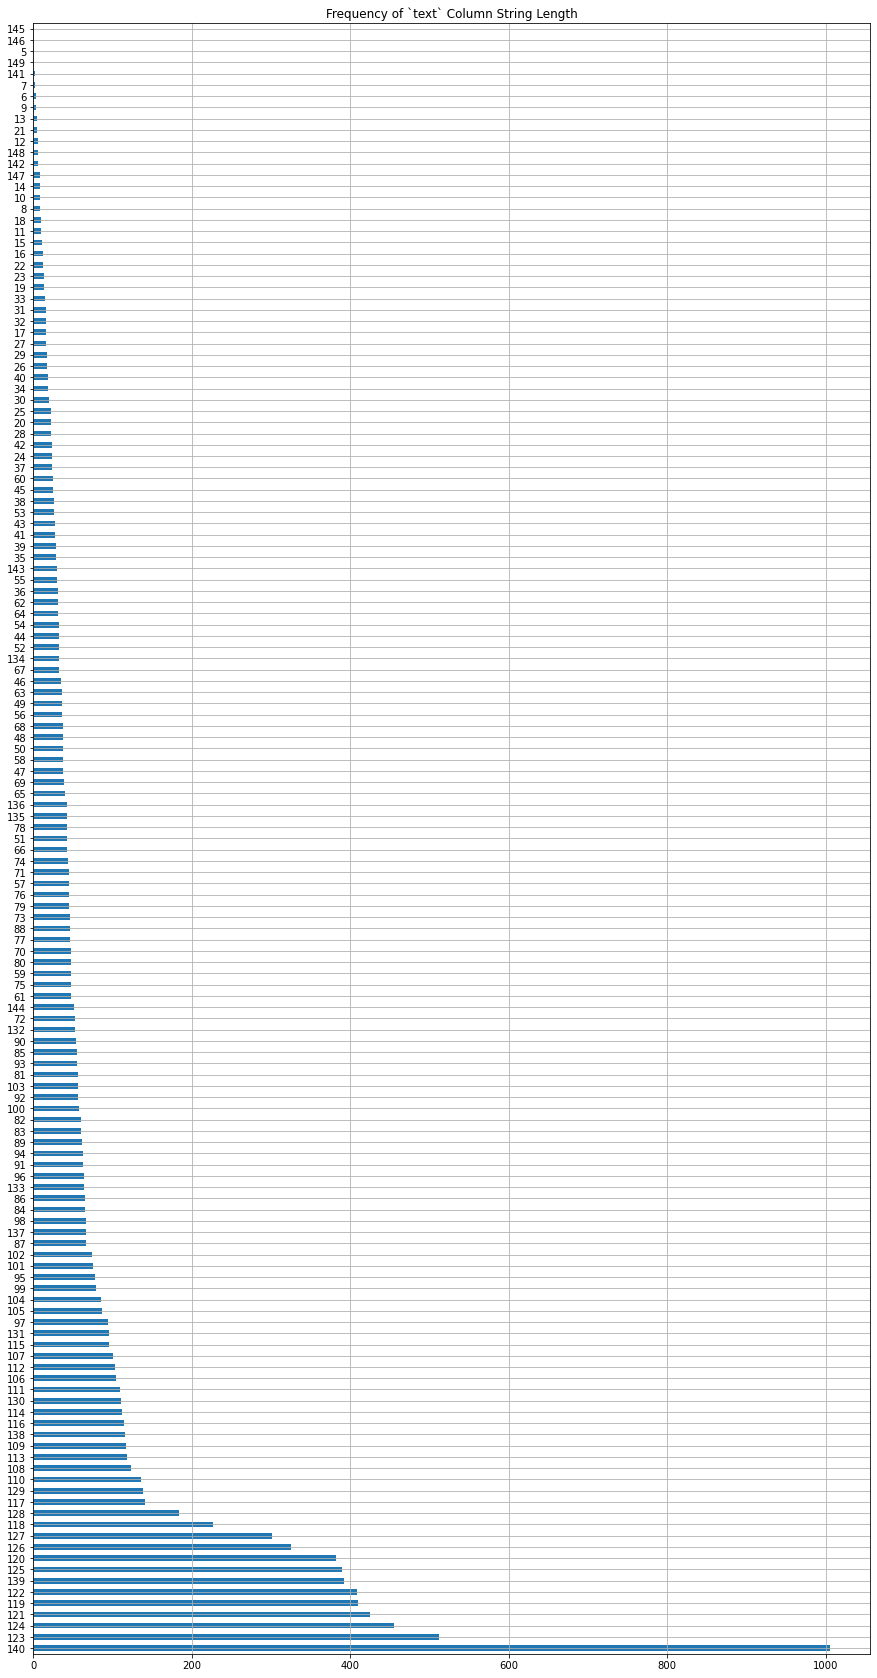

In [27]:
# visualize the `text` Column String Length
plt.figure(figsize = (15,30))

df['text'].str.len().value_counts().plot.barh()
plt.title('Frequency of `text` Column String Length')
plt.grid()

plt.show()

It seems that string length of a big part of the entries lay around > 120 characters. What is the impact of this?
- Fist off, this indicates that our bag of words will result in a large number of columns
- What else?

We can also see explore the same column for the hash-tags (#) and the URLs. 

In [28]:
print(f'The number of the entries in the `text` column with URLs is {df[df["text"].str.contains("http")].count()[0]} \
entries out of {df.shape[0]} entries in the dataframe.') 

The number of the entries in the `text` column with URLs is 5495 entries out of 11350 entries in the dataframe.


In [29]:
print(f'The number of the entries in the `text` column with hash-tags is {df[df["text"].str.contains("#")].count()[0]} \
entries out of {df.shape[0]} entries in the dataframe.') 

The number of the entries in the `text` column with hash-tags is 1529 entries out of 11350 entries in the dataframe.


It is the clear that more than half of the entries of the `text` column include some sort of a URL/link.

The removal of these characters if any will done in the preprocessing phase and that put column number of character will decrease, for now we can say that the data is ready for pre-processing.

-----------------------------------

### Pre-processing

The steps of pre-processing consists of:
- Clean the text from URL's and hashtags and other non-text characters such as emojis
- Change all text to lower case
- normalize words by word Stemming and or lemmatization
- Generate features by the use of Bag-of-words and/or TF_IDF
- Use N-Grams to account for some meanings of linked adjacent words
- Use maximum and minimum words occurrences to control the number of features

The above off course is not an exhaustive list of all preprocessing for NLP application, but are standard for most cases. We will start by this and adjust as we go.

#### URL's and Hashtags removal

First off, it is necessary to stress the point that URL's are not considered as part of the natural language as they do not hold any potential information about the intent of the person writing the tweet. Furthermore they are very likely to be unique at every occurrence rendering them close to useless to work as class discriminators.

It will make more sense if we could remove all the unwanted characters of the text column at once. By the help of exploring them by running a `df.sample()` function, we see that we should remove:
- URL's
- Hashtags
- Emojis such as 🏏 and the like
- words from other languages such as #仮面ライダーゼロワン ＃仮面ライダーバルキリ and so


URL's can be removed by searching for the `https` keyword and deleting all the string attached to it. all the rest of the unwanted characters can be deleted by deleting anything that is not and ascii character.

In [30]:
# Remove all emojs and other languages - ASCII for ENGLISH
# https://stackoverflow.com/questions/57514169/how-can-i-remove-emojis-from-a-dataframe
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

This works by encoding all text into ascii and then decoding it again removing all non-ascii characters.

In [31]:
# take and check some samples
df.sample(10)

,keyword,text,target
id,,,
7124,lightning,"DECARLO - ""Lightning strikes twice"" Review https://t.co/PO0JmstJSG",0
1375,body%20bagging,Poor . I think hes dead after this body bagging.,1
8427,razed,Will his home be razed?,0
1613,bombing,Do these images disturb you?? They should . The bombing was planned!!! By who or whom?? The pictures on the left an,0
10415,trauma,Many thanks to everyone we are now suffering trauma after the fact and trying to get things back to normal. It has been very,1
5562,fire,There is an old Iranian proverb: You dont put the wooden pot on the fire twice. Someone needs to tel,0
51,accident,When you hurt your younger sibling by accident https://t.co/DAMTEoQtZU,0
3058,dead,kny stans quiet fuck we supposed to talk about everybody dead,0
290,annihilation,What in the annihilation is this? https://t.co/R806oQ6eaq,0


As we see on the samples above, we have got rid of all emojis but not the URL's and the hashtags. These will be dealt with next. The most intuitive way to use regex in a a Lambda function to delete them since we do not know how many characters will follow the https or the hashtag.

In [32]:
# removing all strings starting by http, www or #
df = df.astype(str).apply(lambda x: x.str.replace('http\S+|www.\S+|#\S+', '', case=False, regex=True))

This works by removing all strings starting by http, www or #. Note that we did not want to use the same code line to delete the %20 in the keyword column as we would like to replace it by a space rather than deleting it and this will be done next, but for now let us look at some samples of out dataframe.

In [33]:
df.sample(10)

,keyword,text,target
id,,,
3623,derail,Govtshd provide employment to Hindus esp the Dalits to defuse the curren,0
645,attacked,"The Congress attacked Modi and called him a Hindu Jinnah. Using words like Hindu Jinnah, Hindu terror",0
4411,drowned,The Batman who laughs cosplayed by (IG). Drowned cosplayed by cosplayprincesssunshine (IG). Joker Robin's cospla,0
10922,weapons,.: Our sanctions will continue until the regime stops its terrorist activity and commits to never having nuclear w,0
9135,seismic,Strong seismic movement detected at home. As much as 1.34 was detected 2020-01-14T05:57:59Z.,1
776,bioterror,"Mexican Border: Portal For Swine Flu, TB, Bioterror via",0
10814,war%20zone,take into consideration that this war zone was created 1500 years ago by a religious sect,0
5017,epicentre,So excited for Unknown Artists Band Live at the Epicentre Jan 24th! You can grab your tickets HERE&gt;,0
4881,emergency%20services,"True, what a mess we are in that abuse of our emergency services has become common place .",0


In [34]:
# replace %20 by a space
# https://regex101.com/
df['keyword'] = df['keyword'].replace('(%20)', ' ', regex=True)

In [35]:
df.sample(10)

,keyword,text,target
id,,,
674,avalanche,JUST IN: Avalanche strikes Indian Army post in Machil sector along LoC in Jammu &amp; Kashmir. 5 soldiers were believed to b,1
8192,police,"My days in the National Police Academy, Hyderabad",0
10966,weapons,"A selfie stick, a marker pen, a spray glue and couple of posters. What do you think about these items?",0
6774,injured,Volunteers around Australia are caring for wildlife injured and orphaned in the bushfires.,1
10252,thunderstorm,"Severe thunderstorm woke me up, had a panic attack due to sound of thunder. Not having a good time right now",1
5910,flooding,VENICE RUNS DRY: Gondolas stranded in mud just two months after severe flooding,1
4629,earthquake,The grant will go to the Foundation for Earthquake Relief Fund which will be used to activate a serie,0
10389,trapped,Don't waste your time living someone else's life. Don't be trapped by dogma-which is living with the results of other people's thinking.,0
2740,crashed,crashed my car,1


Now the text and the keyword columns are clean and therefore we can proceed with the next steps on our pre-processing. The next one would by lowercasing our text before creating out bag-of-words. The ultimate purpose of the case_lowering is to prevent treating the same word twice should it has a duplicate with a capital letter.

We can simply do this by using the string `.lower()` function wrapped in a Lambda function.

In [36]:
# convert all words to lower-case
df = df.astype(str).apply(lambda x: x.str.lower())

In [37]:
df.sample(10)

,keyword,text,target
id,,,
2390,collapsed,"they had already collapsed though, there is no magic bullet to fix decade mess lets be honest. the ''virus''",0
1976,bush fires,"in pairs, our workshop participants designed &amp; coded a disaster detector system! this pair designed a rural fire",0
1813,buildings on fire,"fire them all on the top 3 floors of the fbi! take all computers, cell phones, copy machi",0
10523,trouble,it's parliament as a whole has an onus for this&amp; the deterioration's down to all. the,0
6443,hijack,"hey, , with headlines like this every handful of protesters could hijack the national media",0
565,attack,this has raised serious questions on national security. i had raised this even during the uri attack that they enter,0
6157,harm,"he lost his job but never his monbebes so as long as we are here, we will never allow anyone to harm our hoseok again. we w",0
5319,famine,going back through my works serves as a reminder that i adore writing. i've been so focused on my characters that i,0
8415,razed,where was ramguha when 4 lakh kashmiri pandits flee from valley,0


Off course before we create our features, we will have to normalize the text by Stemming and/or Lemmatizing the text to reduce the number of the to-be generated features as this Stemming and Lemmatization return words back to their original forms but they do that differently. In fact, Stemming and Lemmatization are two different techniques to reduce the features dimensionality. Stemming is more mechanical and crude - but usually faster - and can result in words that do not exist as stemmers remove the words affixes. Lemmatization algorithms are more effective as they reduce the dimensionality by reducing words back to their basic dictionary form. They also use the documents surrounding words to perform the Lemmatization operation.

For this project, we will not do stemming and only do Lemmatization since the feature number is not expected to massively be big after removing URL's.

There are many Lemmatizers commonly used but we will using spaCy is said to be faster (Although this is not very significant on this project due to the number if words we have) and provides more accurate syntactic analysis that other Lemmatization algorithms such as NLTK.

In addition to using spaCy for Lemmatization, we will also use it for Named Entity Recognition (NER) as this has a potential to enhance our model performance.

Before we continue, we will need to split our data into train and test set to prevent data leakage. We will split our data into two sets, 75% for training and 25% for testing that we will later use for the model evaluation.

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
# Rest index as we deleted many entries
df.reset_index(inplace=True)

In [53]:
# # Separate data into X and y before 
# X = 
# y = 

# splitting a stratified train and test data
df_train, df_test = train_test_split(df, test_size = 0.25, random_state = 123, stratify = df['target'])

In [54]:
# checking the size of the split dataframes
df_train.shape, df_test.shape

((8512, 4), (2838, 4))

As we see above, the dataframe has now been split into two dataframes, train set as 75% of the data and test set with 25%. Now we can normalize the data.

In [81]:
# Check the version of spaCy
!pip show spacy

Name: spacy
Version: 3.1.2
Summary: Industrial-strength Natural Language Processing (NLP) in Python
Home-page: https://spacy.io
Author: Explosion
Author-email: contact@explosion.ai
License: MIT
Location: c:\users\omass\anaconda3\envs\deeplearning\lib\site-packages
Requires: murmurhash, blis, pathy, thinc, tqdm, jinja2, packaging, typer, requests, catalogue, srsly, pydantic, setuptools, cymem, spacy-legacy, preshed, numpy, wasabi
Required-by: en-core-web-sm


In [80]:
# import SpaCy
import spacy

# Instantiate SpaCy
spacy_Lemmatizer = spacy.load('en_core_web_sm')

In [61]:
# copy the dataframes into a new container as we will use differnt dataframe versions in our modelling to make comparisons
df_train_lemma_sc = df_train.copy()
df_test_lemma_sc = df_test.copy()

# function to tokize and lemmatize text
def spacy_lemmatize(text):
    lemmatized_text = '' 
    lemmatized_doc = spacy_Lemmatizer(text)
    for token in lemmatized_doc:
        lemmatized_text += ' ' + token.lemma_
    
    return lemmatized_text

# Apply the lemmatizer on the train and test data
df_train_lemma_sc['text_spacy_Lemmatized'] = df_train_lemma_sc.text.apply(spacy_lemmatize)
df_test_lemma_sc['text_spacy_Lemmatized']  = df_test_lemma_sc.text.apply(spacy_lemmatize)

As we can imagine, the above operation is not a short one, and yes, it took some time to finish, are around a minute and a half.

In [76]:
df_train_lemma_sc.sample(5)

,id,keyword,text,target,text_spacy_Lemmatized
3419,3424,demolish,israeli authorities order jerusalemite to demolish his home via pic,0,israeli authority order jerusalemite to demolish his home via pic
5608,5619,fire truck,"bong joon-ho to me just now re: his nominations for parasite: ""i feel it's like inception, where soon i'm going to wake up a",0,"bong joon - ho to I just now re : his nomination for parasite : "" I feel it be like inception , where soon I be go to wake up a"
8106,8124,panicking,it's a very old story. it's from a very old book. we have all heard about it before. why are the satanic panicking?,0,it be a very old story . it be from a very old book . we have all hear about it before . why be the satanic panicking ?
3710,3715,derailment,"hi there, i'm very sorry about this. we are running a reduced service this morning to the freight tr",1,"hi there , I be very sorry about this . we be run a reduce service this morning to the freight tr"
6578,6592,hostage,"it was not a witch hunt little boy, it's called an you are the 3rd person in american history",0,"it be not a witch hunt little boy , it be call an you be the 3rd person in american history"


Let us now make some comparison between the original `text` column and the newly created lemmatized columned that we called `test_spacy_lemmatized`:
- Punctuations are still present in our text (as expected) but has been separated from words which makes it easier to get rid of
- Words have been lemmatized, example: `annihilated` has been lemmatized to `annihilate`, `screaming` to `scream`, that is good!
- Words such as `statistics` were turned to `statistic` without an `s`, hmmmmmm, this is not perfect but is an expected lemmatization behavior
- There are some words such `dmregister` that does not carry any potential value for classification
- Pronouns such as `i` has been lemmatized to `I`
- Some words with apostrophe S were stripped from their apostrophe
- Words such as `joon-ho` have been changed to `joon`, `-` and `ho`

It seems now that although the lemmatization job done is now perfect, it serves the purpose of this project. We however now need to remove all punctuations before we generate our features, and this is what we will do next.

There are probably numerous way of removing punctuations, here we will use one that is claimed to be one of the fastest.

In [88]:
# https://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string

# Import regex operations and string libraries
import re, string

# remove punctuations from the train set
df_train_lemma_sc['text_spacy_Lemmatized'] = df_train_lemma_sc['text_spacy_Lemmatized'].\
apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)))

In [108]:
# do the same for the test set
df_test_lemma_sc['text_spacy_Lemmatized'] = df_test_lemma_sc['text_spacy_Lemmatized'].\
apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)))

In [107]:
df_train_lemma_sc.sample(5)

,id,keyword,text,target,text_spacy_Lemmatized
2674,2679,crash,"dont rush the come up by trying to impress folks, thats how you become a crash dummy.",0,do nt rush the come up by try to impress folk that s how you become a crash dummy
7155,7171,loud bang,"even news sites are being loud about it, we didn't meant to, wearesorry!!",0,even news site be be loud about it we do nt mean to wearesorry
10678,10696,violent storm,we are not crazy. we are not violent. we just arent who [they] want us to be. sheep no more! we are truth seeking patriots,0,we be not crazy we be not violent we just be nt who they want we to be sheep no more we be truth seek patriot
3820,3826,desolation,the vineyard of desolation,0,the vineyard of desolation
7407,7423,mayhem,monday resistor mayhem 4,0,monday resistor mayhem 4


Looking again at the `text_spacy_Lemmatized` column we have just manipulated, we see that all punctuations have disappeared, but we notice that numbers do exit on our text. We will be better off to reduce the number of our features to remove them as they bear very low value with respect to classes discrimination. This is what we will do next.

In [109]:
# remove numbers from the train set
df_train_lemma_sc['text_spacy_Lemmatized'] = df_train_lemma_sc['text_spacy_Lemmatized'].\
apply(lambda s: re.sub(r"\b[0-9]+\b\s*", "", s))

In [128]:
# do the same for the test set
df_test_lemma_sc['text_spacy_Lemmatized'] = df_test_lemma_sc['text_spacy_Lemmatized'].\
apply(lambda s: re.sub(r"\b[0-9]+\b\s*", "", s))

In [186]:
df_train_lemma_sc.sample(5)

,id,keyword,text,target,text_spacy_Lemmatized
9080,9098,seismic,"well he did once wear a tan suit. like, how are you ever meant to get over a seismic scandal like that?",0,well he do once wear a tan suit like how be you ever mean to get over a seismic scandal like that
1140,1142,blizzard,blizzard is pushing world of warcraft into the future with visions of nzoth update &gt;,0,blizzard be push world of warcraft into the future with vision of nzoth update gt
4616,4624,earthquake,"a m4.7 earthquake has been reported by the geofon for m 4.7, philippine islands region. link:",1,a m47 earthquake have be report by the geofon for m philippine island region link
3830,3836,desolation,"""but when ye shall see the abomination of desolation, spoken of by daniel the prophet, standing where it ought not, (let",0,but when ye shall see the abomination of desolation speak of by daniel the prophet stand where it ought not let
8870,8888,sandstorm,also random,0,also random


Now we can create out features by using bag-of-words and TF-IDF. 

Why not one of them? Why both?

This is due to the fact that there is no agreement between data scientists and practitioners as to which one is better. The smart data scientist would try both and use both on their model and compare the performance of each on the particular problem on hand, and that is why we will use both of them.

Before moving on it is worth to mention that it was probably more efficient to do more that one of the pre-processing operations at once instead of doing them one by one, but this is of low significance on this project. 

Also some of what we will do next such as stop words removal could have also been done with one of the previous operations or even create a cleaning pipeline, but this is not important now. Now, let us create our features, but before that let us delete the `text` column as we do not need it any more..

In [143]:
# delete the text column from the train and the test dataframes
df_train_lemma_sc.drop('text', axis = 1)

,id,keyword,target,text_spacy_Lemmatized
3291,3296,deluge,0,the sector have see a deluge of disruption from multiple direction which model show the most promis
258,258,annihilated,0,nicki minaj single handedly annihilate the male specie the day this drop
4888,4898,engulfed,1,dmregister rt tdavisdmr a man be believe to have end a daylong standoff with police by set fire to his own
8962,8980,screaming,0,I m scream bc the baby probably still see in black and white and she s scream at imthekdjenendnx
7902,7919,oil spill,0,surprising oil tanker spill statistic publish
...,...,...,...,...
7178,7194,loud bang,0,spirit come to we for many different reason today be to save our life liz be head out the door with our d
3170,3175,death,0,there s an amazing wwii story about this
4967,4977,engulfed,0,joe buck welcome to the ninth hour of the national title game as we enter the fourth quarter sun rise sun keep get
7847,7864,obliterated,0,I be feel a bit nostalgic for the old a picture be worth word day before social medium obliterate truth


#### Bag of words

In [140]:
# import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [195]:
# initialize the count vectorizer with stop words removal
bow = CountVectorizer(stop_words='english')

# fit and transform the train data (No test data transformation to prevent data leakage)
bow.fit(df_train_lemma_sc.text_spacy_Lemmatized)
train_data_trans_cv = bow.transform(df_train_lemma_sc.text_spacy_Lemmatized)

# transform the test data
test_data_trans_cv = bow.transform(df_test_lemma_sc.text_spacy_Lemmatized)

In [200]:
#
words = bow.get_feature_names()
len(words)

14061

There are 14061 words in this bag if words.

### TF-IDF

In [141]:
# import the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [202]:
# initialize the tfidf vectorizer with stop words removal
tfidf = TfidfVectorizer(stop_words='english')

# fit and transform the train data (No test data transformation to prevent data leakage)
tfidf.fit(df_train_lemma_sc.text_spacy_Lemmatized)
train_data_trans_tfidf = tfidf.transform(df_train_lemma_sc.text_spacy_Lemmatized)

# transform the test data
test_data_trans_tfidf = tfidf.transform(df_test_lemma_sc.text_spacy_Lemmatized)

In [203]:
#
words = tfidf.get_feature_names()
len(words)

14061

There are 14061 words in this TF-IDF vectorized dataframe.

### Modelling